C:\Users\HL\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


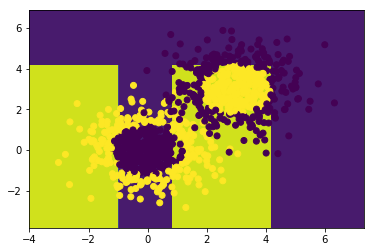

0.767


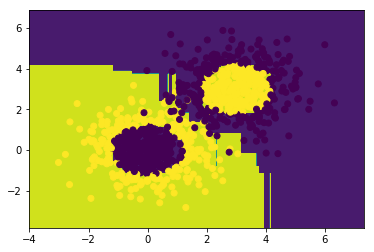

0.989


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.metrics import classification_report

#生成2维正态分布，生成的数据按分位数分为: 2类，500个样本，2个样本特征
x1,y1 = make_gaussian_quantiles(n_samples=500,n_features=2,n_classes=2)

#生成2维正态分布，生成的数据按分位数分为：2类，500个样本，2个样本特征均值都为3
x2,y2 = make_gaussian_quantiles(mean=(3,3),n_samples=500,n_features=2,n_classes=2)#mean()中心点坐标

#将两组数据合成一组数据
x_data = np.concatenate((x1,x2))
y_data = np.concatenate((y1,-y2+1))#y2 1变0 ，0变1

#获取数据值所在的范围
x_min,x_max = x_data[:,0].min()-1,x_data[:,0].max()+1
y_min,y_max = x_data[:,1].min()-1,x_data[:,1].max()+1

###-------------------- 决策树模型 -------------------- 
###决策树模型
model = DecisionTreeClassifier(max_depth=3)

#输入数据 建立模型
model.fit(x_data,y_data)

#生成网格矩阵
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),
                    np.arange(y_min,y_max,0.02))

#获取预测值
z = model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

#等高线图
cs = plt.contourf(xx,yy,z)

#样本散点图
plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()

#模型准确率
print(model.score(x_data,y_data))

###-------------------- AdaBoost模型 -------------------- 
###AdaBoost模型
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=10)

#输入数据 建立模型
model.fit(x_data,y_data)

#生成网格矩阵
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),
                    np.arange(y_min,y_max,0.02))

#获取预测值
z = model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

#等高线图
cs = plt.contourf(xx,yy,z)

#样本散点图
plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()

#模型准确率
print(model.score(x_data,y_data))


